In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
#hide
Path.BASE_PATH = path

In [4]:
fname = (path/"images").ls()[0]
fname

Path('images/miniature_pinscher_199.jpg')

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=setup_aug_tfms([
                     Rotate(draw=30, p=1, size=224), 
                     Zoom(draw=1.2, p=1., size=224),
                     Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
                 )

dls = pets.dataloaders(path/"images")
#pets.summary(path/"images")

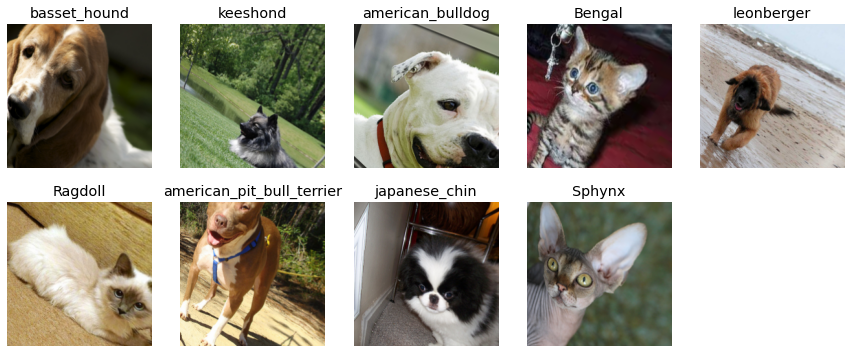

In [6]:

dls.train.show_batch(nrows=2, ncols=5)

In [25]:

learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(6, lr_max=0.00015848931798245758)

epoch,train_loss,valid_loss,error_rate,time
0,4.634305,2.671974,0.711096,01:26
1,2.534168,0.806485,0.219215,01:26
2,1.461400,0.502778,0.150880,01:26
3,1.010329,0.410342,0.121786,01:27
4,0.898051,0.384088,0.115020,01:26
5,0.852725,0.378356,0.110284,01:26


SuggestedLRs(valley=0.0002290867705596611)

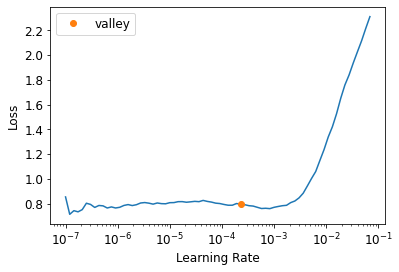

In [27]:
learn.unfreeze()
lr_found = learn.lr_find()
lr_found 

In [ ]:
learn.fit_one_cycle(12, lr_max=slice(1e-5,1e-3))

In [24]:
learn.fine_tune??

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      /opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py
Type:      method


SuggestedLRs(valley=0.00015848931798245758)

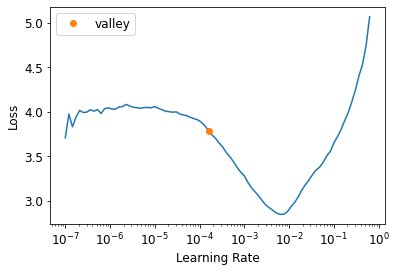

In [19]:
lr_found = learn.lr_find()
lr_found 

In [8]:
sample = (path/'images').ls()[1,10,11]
sample, learn.predict(sample[1])

((#3) [Path('images/newfoundland_183.jpg'),Path('images/Siamese_42.jpg'),Path('images/basset_hound_80.jpg')],
 ('Siamese',
  TensorBase(10),
  TensorBase([1.2694e-05, 6.7955e-08, 2.2327e-03, 7.6997e-07, 2.0691e-07, 2.5423e-08, 6.0432e-09, 4.5965e-09, 7.0464e-05, 1.2051e-06, 9.9767e-01, 1.1155e-06, 8.8676e-07, 1.4105e-08, 2.4968e-07, 8.1905e-09,
          2.6299e-07, 9.7585e-07, 5.5237e-07, 1.3782e-09, 9.7350e-08, 2.0258e-07, 6.1956e-09, 2.7037e-08, 1.1131e-07, 2.9866e-07, 6.2391e-07, 3.1394e-07, 9.6867e-08, 6.7269e-07, 1.2481e-07, 6.0244e-08,
          3.6961e-08, 2.5013e-06, 4.1449e-07, 1.1784e-06, 4.0523e-07])))

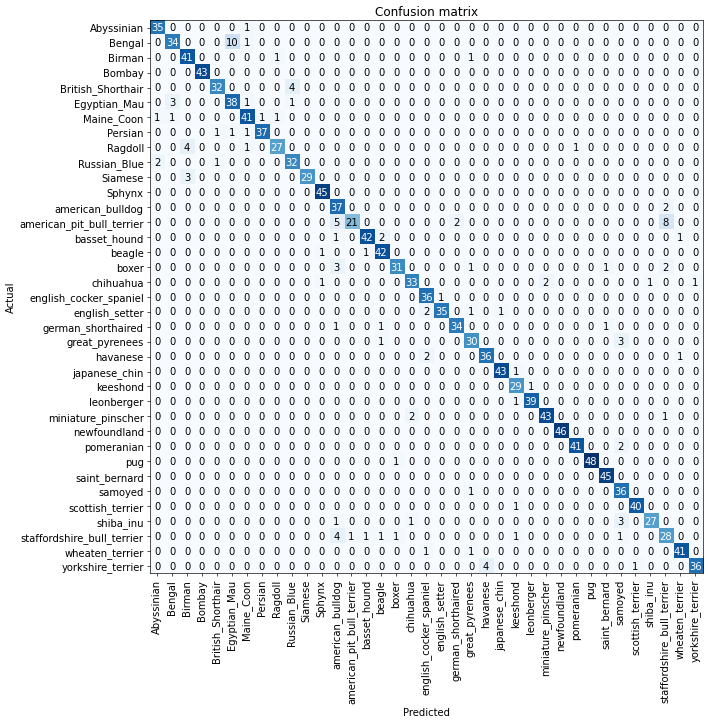

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

In [10]:
x, y = dls.one_batch()
preds, targets = learn.get_preds(dl=[(x,y)])
len(x), len(y), len(preds), len(targets)

(64, 64, 64, 64)

In [11]:
act = torch.randn((6, 2)) * 2
act, torch.softmax(act, dim=1)

(tensor([[-1.2777,  1.2582],
         [ 1.1777,  2.5570],
         [-1.6045, -3.3076],
         [ 2.2148, -2.0914],
         [-0.8381, -4.8215],
         [-2.7693,  3.2209]]),
 tensor([[0.0734, 0.9266],
         [0.2011, 0.7989],
         [0.8459, 0.1541],
         [0.9867, 0.0133],
         [0.9817, 0.0183],
         [0.0025, 0.9975]]))